In [1]:
#%matplotlib notebook
from pylab import *
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

In [2]:
mpl.rcParams.update({'font.size':18})

In [3]:
x,y,f = np.loadtxt("LatticeSierpinski_54x54.xyz",usecols=(1,2,4),skiprows=2,unpack=True)

In [4]:
r = 1.1
Dic = {}
natoms = int( len(x) )
for n in range(natoms):
    a = sqrt( (x[n]-x)*(x[n]-x) + (y[n]-y)*(y[n]-y) ) < r
    vecinos = [i for i, x in enumerate(a) if x and i!=n]
    Dic[n] = vecinos

In [5]:
H = np.zeros((natoms,natoms))

In [6]:
γ = 1
λ = 4.5
for n in Dic.keys():
    vecinos = Dic[n]
    for v in vecinos:
        f0 = f[n]
        f1 = f[v]
        if f0 == f1:
            fase = γ
        else: 
            fase = λ
        H[n,v] = fase
        H[v,n] = fase

f0 = 0
f1 = 0
fase = 1
for n in Dic.keys():
    vecinos = Dic[n]
    for v in vecinos:
        posx     = x[n]
        posy     = y[n]
        f0       = f[n]
        f1       = f[v] 
        if f0 == f1:
            fase = γ
        else: 
            fase = λ
        
        if ( posx%2==0 and posy%2==0  ):
            if ( x[v] > x[n] ):
                H[(n,v)] = -fase
                H[(v,n)] = -fase
        elif(posx%2==1 and posy%2==1):
            if ( x[v] > x[n] ):
                H[(n,v)] = -fase
                H[(v,n)] = -fase
        else:
            pass

In [7]:
print(H)

[[ 0. -1.  1. ...  0.  0.  0.]
 [-1.  0.  0. ...  0.  0.  0.]
 [ 1.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  1.]
 [ 0.  0.  0. ...  0.  0.  1.]
 [ 0.  0.  0. ...  1.  1.  0.]]


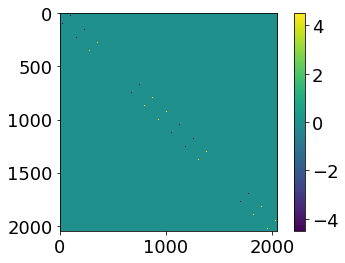

In [8]:
imshow(H)
colorbar()

In [9]:
%%time
Ek, U = eig(H)
Ek = np.real(Ek)
U = np.real(U)

CPU times: user 31.7 s, sys: 71.7 ms, total: 31.8 s
Wall time: 3.24 s


In [10]:
np.savetxt("Energias.txt",Ek,fmt = '%s', comments = '')
np.savetxt("Estados.txt",U,fmt = '%s', comments = '')

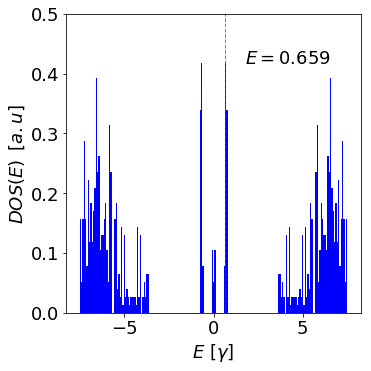

In [11]:
ek = 0.659
fig, ax = plt.subplots(figsize = (5.5,5.5))
ax.hist(np.real(Ek),201,color = 'b', density = 1)
ax.set_ylabel('$DOS(E)\,\,\,[a.u]$')
ax.set_xlabel('$E\,\, [\gamma]$')
#ax.set_title('Density of States')
ax.set_ylim(0,0.5)
ax.annotate("$E = {0:.3f}$".format(ek),
            xy=(ek, 0.4), xycoords='data',
            xytext=(20, 10), textcoords='offset points',
           size = 18)
ax.plot((ek,ek),(0,100),c = 'r',lw = 1, ls = '--', alpha=0.7)
fig.tight_layout()
fig.savefig('DOS_Ek0659.pdf')

In [12]:
indexsort = argsort(Ek)
Est = [i for i,val in enumerate(Ek) if abs(val) < 0.0005]
ek = np.mean(Ek[Est])
s = [U.T[i]*U.T[i] for i in Est]
S = np.zeros(len(s[0]))
for i in range(len(s)):
    S += s[i] 
S = S/len(s)

In [13]:
Rx = []
Ry = []
for i in np.unique(f):
    find = [j for j,val in enumerate(f) if val == i]
    X = [x[i] for i in find]
    Y = [y[i] for i in find]
    xmax = np.amax(X)
    xmin = np.amin(X)
    ymax = np.amax(Y)
    ymin = np.amin(Y)
    rx = (xmax + xmin)/2
    ry = (ymax + ymin)/2
    Rx.append(rx)
    Ry.append(ry)

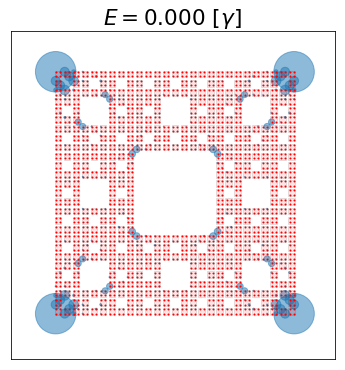

In [14]:
fig, ax = plt.subplots(figsize = (5.5,5.5))
ax.scatter(x,y,s=S*10000,alpha=0.5)
ax.scatter(x,y,s = 1, c = 'r')
boxes = []
for i in range(len(Rx)):
    rect = Rectangle((Rx[i] - .75, Ry[i] - .75), 1.5,1.5)
    boxes.append(rect)

pc = PatchCollection(boxes, facecolor='r', alpha=0.1,edgecolor='black')
ax.add_collection(pc)
fig.tight_layout()
#ax.set_aspect('equal')
ax.set_title("$E = {0:.3f}\,\, [\gamma]$".format(ek))
ax.set_xlim(-10,62)
ax.set_ylim(-10,62)
ax.set_xticks([])
ax.set_yticks([])
plt.show()
fig.savefig('Ek0_54x54.pdf')

In [15]:
from ipywidgets import *


In [16]:
Ei = np.unique(np.round(Ek,3))
@interact(n=(0,len(Ei) - 1))
def enpsi(n=0):
    Est = [i for i,val in enumerate(np.round(Ek,3)) if val == Ei[n]]
    Esel = Ei[n]
    s = [U.T[i]*U.T[i] for i in Est]
    S = np.zeros(len(s[0]))
    for i in range(len(s)):
        S += s[i] 
    S = S/len(s)
    
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6.0,6.0))
    axes.set_title("Ek = {0:.3f}".format(Esel))
    axes.scatter(x,y,color="red",s=1,zorder=2)
    axes.scatter(x,y,s=S*10000,alpha=0.5)
    
    fig.tight_layout()
    boxes = []
    for i in range(len(Rx)):

        rect = Rectangle((Rx[i] - .75, Ry[i] - .75), 1.5,1.5)
        boxes.append(rect)

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(boxes, facecolor='r', alpha=0.1,
                         edgecolor='black')

    # Add collection to axes
    axes.add_collection(pc)
    plt.xlim(-6,59)
    plt.ylim(-6,59)
    plt.show()

    

interactive(children=(IntSlider(value=0, description='n', max=828), Output()), _dom_classes=('widget-interact'…

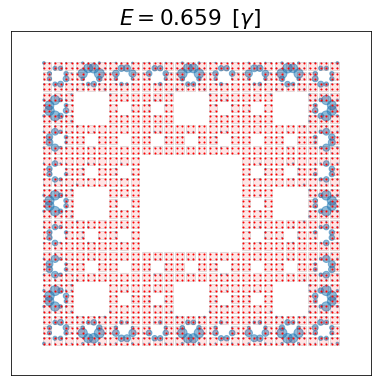

In [17]:
Ei = np.unique(np.round(Ek,3))
n = 431
Est = [i for i,val in enumerate(np.round(Ek,3)) if val == Ei[n]]
Esel = Ei[n]
s = [U.T[i]*U.T[i] for i in Est]
S = np.zeros(len(s[0]))
for i in range(len(s)):
    S += s[i] 
S = S/len(s)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6.0,6.0))
axes.set_title("$E = {0:.3f}\,\,\, [\gamma]$".format(abs(Esel)))
axes.scatter(x,y,color="red",s=1,zorder=2)
axes.scatter(x,y,s=S*10000,alpha=0.5)

fig.tight_layout()
axes.set_xticks([])
axes.set_yticks([])

boxes = []
for i in range(len(Rx)):

    rect = Rectangle((Rx[i] - .75, Ry[i] - .75), 1.5,1.5)
    boxes.append(rect)

# Create patch collection with specified colour/alpha
pc = PatchCollection(boxes, facecolor='r', alpha=0.1,
                     edgecolor='black')

# Add collection to axes
axes.add_collection(pc)
plt.xlim(-6,59)
plt.ylim(-6,59)

fig.savefig('Ek0659_54x54.pdf')
plt.show()


In [18]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes,inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [19]:
E = []
R = []
n = len(Ek[indexsort])-1
for k in range(n):
    E.append(abs(Ek[k]-Ek[k+1]))
E = np.array(E)
for i in range(n):
    if E[i]> 0.5:
        rec = Rectangle((-30,Ek[indexsort][i]),n+30,E[i])
        R.append(rect)

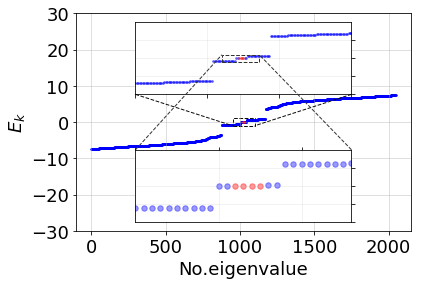

In [20]:
fig, ax = plt.subplots()

Ek_nc = [Ek[indexsort][i] for i in range(len(Ek)) if not(Ek[indexsort][i] in Ek[indexsort][1022:1026])]
rang =[i for i in range(len(indexsort)) if not(i in range(1022,1026))]

ax.scatter(rang,Ek_nc, c = 'b',s = 2, alpha=0.6)
ax.scatter(range(1022,1026),Ek[indexsort][1022:1026], c = 'r', s = 2, alpha = 0.6)
ax.set_xlabel("No.eigenvalue")
#ax.set_title("Lattice 162x162")
ax.set_ylabel("$E_k$")
ax.set_ylim(-30,30)
re = PatchCollection(R, facecolor='r', alpha=0.1,
                         edgecolor='black')
ax.add_collection(re)
ax.grid(alpha = 0.5)

axins = inset_axes(ax,width=3, height = 1,  loc=9) 
axins.scatter(rang,Ek_nc, c = 'b',s = 3, alpha=0.5)
axins.scatter(range(1022,1026),Ek[indexsort][1022:1026], c = 'r', s = 3, alpha = 0.5)
x1, x2, y1, y2 = 950, 1100, -1, 1
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
plt.xticks(visible=False)
plt.yticks(np.arange(-1,1,step = 0.5), visible=False)
axins.grid(alpha = 0.2)
axins.tick_params(left=False, right=True,top=False,bottom=True, labelleft=False, labelright=False,labelbottom=False, labeltop=False)
mark_inset(ax, axins,loc1=3, loc2=4, fc="none",ec="0.05", ls = "--")


axins2 = inset_axes(ax,width=3, height = 1, loc=8)#,bbox_to_anchor=1) # zoom = 6
axins2.scatter(rang,Ek_nc, c = 'b',s = 30, alpha=0.4)
axins2.scatter(range(1022,1026),Ek[indexsort][1022:1026], c = 'r', s = 30, alpha = 0.4)
x3, x4, y3, y4 = 1010, 1036, -.1, .1
axins2.set_xlim(x3, x4)
axins2.set_ylim(y3, y4)
axins2.tick_params(left=False, right=True,top=True,bottom=False, labelleft=False, labelright=False,labelbottom=False, labeltop=True)

plt.xticks(visible=False)
plt.yticks(np.arange(-0.1,0.1,step = 0.05), visible=False)
axins2.grid(alpha = 0.2)

mark_inset(axins,axins2, loc1=2, loc2=1, fc="none",ec="0.2", ls = "--")

plt.draw()
plt.show()

fig.savefig('Ekvs#Ek_con_54x54.pdf')